In [1]:
%matplotlib widget

In [2]:
import numpy as np
import sys
sys.path.append('src')
import pickle
import matplotlib.pyplot as plt

import vgn
from inference.detection import VGN, select_local_maxima
from inference.perception import UniformTSDFVolume
from inference.rviz import Visualizer
from robot_helpers.perception import CameraIntrinsic
from robot_helpers.ros import tf
from robot_helpers import spatial

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [20]:
tsdf = UniformTSDFVolume(1, 40)
intrinsic=CameraIntrinsic(640, 480, 554, 554, 320, 240)
vis=Visualizer()

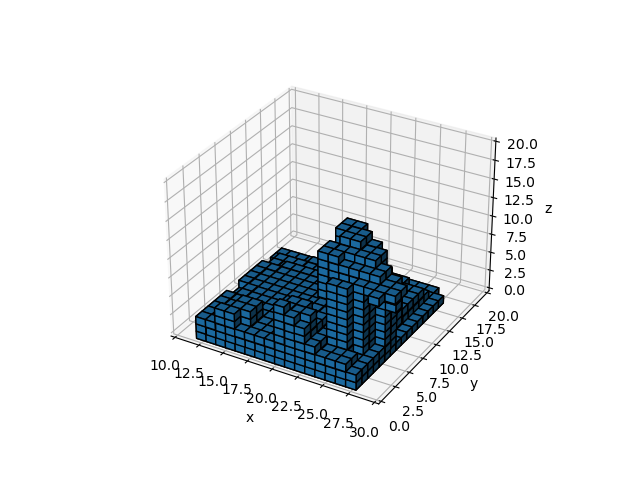

In [24]:
for i in range(3):
    with open(f'extrinsic{i}.ext', 'rb') as f:
        extrinsic = pickle.load(f)
    with open(f'depth{i}.npy', 'rb') as f:
        depth=np.load(f)
    depth=depth.astype(np.float32)/1000
    tsdf.integrate(depth, intrinsic, extrinsic)

tsdf_grid=tsdf.get_grid()
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(tsdf_grid, edgecolor='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(10,30)
ax.set_ylim(0,20)
ax.set_zlim(0,20)

plt.show()

In [17]:
tsdf_grid.max()

0.98900414